In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import tensorflow_datasets as tfds
dataset_name = "cats_vs_dogs"
dataset, info = tfds.load(dataset_name, as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.WM1UQB_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128)) / 255.0
    return image, label

dataset = dataset["train"].map(preprocess).shuffle(10000).batch(32).prefetch(1)

In [4]:
train_size = int(0.8 * info.splits["train"].num_examples)
train_data = dataset.take(train_size)
val_data = dataset.skip(train_size)

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_data, epochs=1, validation_data=val_data)

727/727 ━━━━━━━━━━━━━━━━━━━━ 950s 1s/step - accuracy: 0.6369 - loss: 0.6373


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


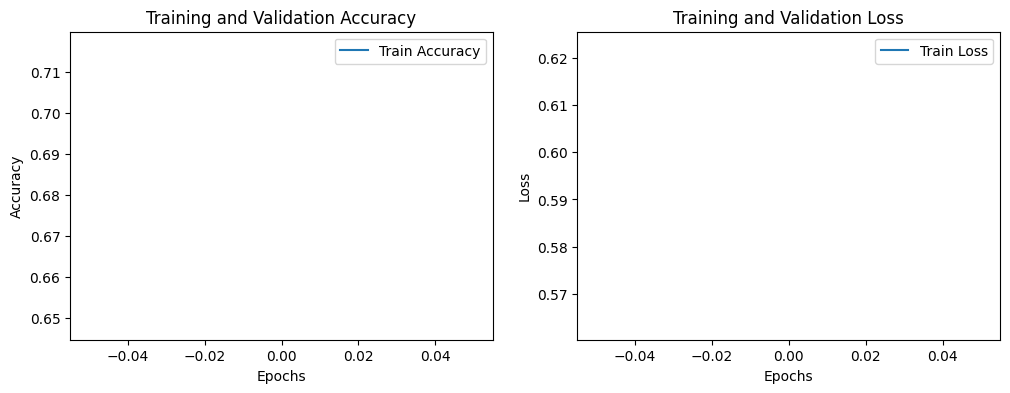

In [11]:
# It was seen that accuracy improved with more epochs (10 epochs were run) but for this demo, I have only demonstrated 1 epoch.

def plot_metrics(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

plot_metrics(history)


In [12]:
# Generate predictions
y_true, y_pred = [], []
for images, labels in val_data:
    y_true.extend(labels.numpy())
    y_pred.extend(model.predict(images).flatten())

y_pred_binary = np.array(y_pred) > 0.5

In [ ]:
# Display classification report
print(classification_report(y_true, y_pred_binary))
print("AUC-ROC Score:", roc_auc_score(y_true, y_pred))